In [279]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, FeatureAgglomeration
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
import scipy
import time

# Set random seed 
import random
random.seed(27)

# Only warn once
import warnings
warnings.filterwarnings('ignore')

# Plot inline
%matplotlib inline


In [268]:
# Dataset 1: Online News Popularity
# Source: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

# Load dataset
raw = pd.read_csv('OnlineNewsPopularity.csv', header = 0)
# Remove leading and trailing white space in column headers
raw = raw.rename(columns=lambda x: x.strip())

# Remove irrelevant columns (e.g. url)
df = raw.drop(['url', 'timedelta'], axis = 1)

# Create a class of data to describe if shares above/below 1400
# This transforms the problem from a continuous state to a binary state
df['class'] = np.where(df['shares'] > 1400, 1, 0)

# Drop the 'shares' data
df = df.drop(['shares'], axis = 1)

# Sample smaller set
df = df.sample(n=5000)

# Univariate Analysis
y = df['class']
X = df.drop(['class'], axis=1)

#Train, Test, Split the dataset to get the training data with a test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


# Normalize feature data
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
# K-MEANS
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/mixture.html
# Metrics: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# Define functions
def kmeans_cluster(X_train, y_train, X_test, y_test, n_iters, n_clusters):

    # Define metrics to evaluate clusters
    davies_bouldin = []
    homogeneity = []
    silhouette = []
    ARI = []
    AMI = []
    runtime = []
        
    # Start timing
    start = time.time()
    
    clf = KMeans(n_clusters = n_clusters, init='k-means++')
    clf.fit(X_train)
    y_test_pred = clf.predict(X_test)
        
    # End timing 
    end = time.time() - start

    # Evaluate clusters
    # Davies-Bouldin Score
    db = metrics.davies_bouldin_score(X_test, y_test_pred)
    #davies_bouldin.append(db)
    
    # Homogeneity Score
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    #homogeneity.append(homo)
        
    # Silhouette Score
    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
    #silhouette.append(sil)
        
    # Adjusted Rand Score
    adjusted_rand_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    #ARI.append(adjusted_rand_score)
    
    # Adjusted Mutual Info Score
    adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(y_test, y_test_pred, average_method = 'arithmetic')
    #AMI.append(adjusted_mutual_info_score)
    
    # Time
    #runtime.append(end)
    
    #print(davies_bouldin)
    #print(homogeneity)
    #print(silhouette)
    #print(ARI)
    #print(AMI)
    #print(time)
    
    #return davies_bouldin, homogeneity, silhouette, ARI, AMI, time
    return db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end
    
def EM(X_train, y_train, X_test, y_test, n_iters, n_components):
# GaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)  

    # Define metrics to evaluate clusters
    davies_bouldin = []
    homogeneity = []
    silhouette = []
    ARI = []
    AMI = []
    runtime = []
    
    # Start timing
    start = time.time()
    
    clf = GaussianMixture(n_components, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=n_iters, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
    clf.fit(X_train)
    y_test_pred = clf.predict(X_test)
    
    # End timing 
    end = time.time() - start

    # Evaluate clusters
    # Davies-Bouldin Score
    db = metrics.davies_bouldin_score(X_test, y_test_pred)
    #davies_bouldin.append(db)
    
    # Homogeneity Score
    homo = metrics.homogeneity_score(y_test, y_test_pred)
    #homogeneity.append(homo)
        
    # Silhouette Score
    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
    #silhouette.append(sil)
        
    # Adjusted Rand Score
    adjusted_rand_score = metrics.adjusted_rand_score(y_test, y_test_pred)
    #ARI.append(adjusted_rand_score)
    
    # Adjusted Mutual Info Score
    adjusted_mutual_info_score = metrics.adjusted_mutual_info_score(y_test, y_test_pred, average_method = 'arithmetic')
    #AMI.append(adjusted_mutual_info_score)
    
    # Time
    #runtime.append(end)
    
    #print(davies_bouldin)
    #print(homogeneity)
    #print(silhouette)
    #print(ARI)
    #print(AMI)
    #print(time)
    return db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end

#kmeans_cluster(X_train, y_train, X_test, y_test, n_iters = 100, n_clusters = 2)
#EM(X_train, y_train, X_test, y_test, n_iters = 100, n_components = 3, n_class = 2)

In [348]:
# Pass to clustering algorithms
davies_bouldin_km = []
homogeneity_km = []
silhouette_km = []
ARI_km = []
AMI_km = []
runtime_km = []

davies_bouldin_em = []
homogeneity_em = []
silhouette_em = []
ARI_em = []
AMI_em = []
runtime_em = []

# Number of target classes
#n = len(y.unique())

# K-Means
n_centers = range(2,50)

for n in n_centers:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = kmeans_cluster(X_train, y_train, X_test, y_test, n_iters = 100, n_clusters = n)
    davies_bouldin_km.append(db)
    homogeneity_km.append(homo)
    silhouette_km.append(sil)
    ARI_km.append(adjusted_rand_score)
    AMI_km.append(adjusted_mutual_info_score)
    runtime_km.append(end_time)
    
# EM
n_comps = range(2,50)

for n in n_comps:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = EM(X_train, y_train, X_test, y_test, n_iters = 100, n_components = n)
    davies_bouldin_em.append(db)
    homogeneity_em.append(homo)
    silhouette_em.append(sil)
    ARI_em.append(adjusted_rand_score)
    AMI_em.append(adjusted_mutual_info_score)
    runtime_em.append(end_time)

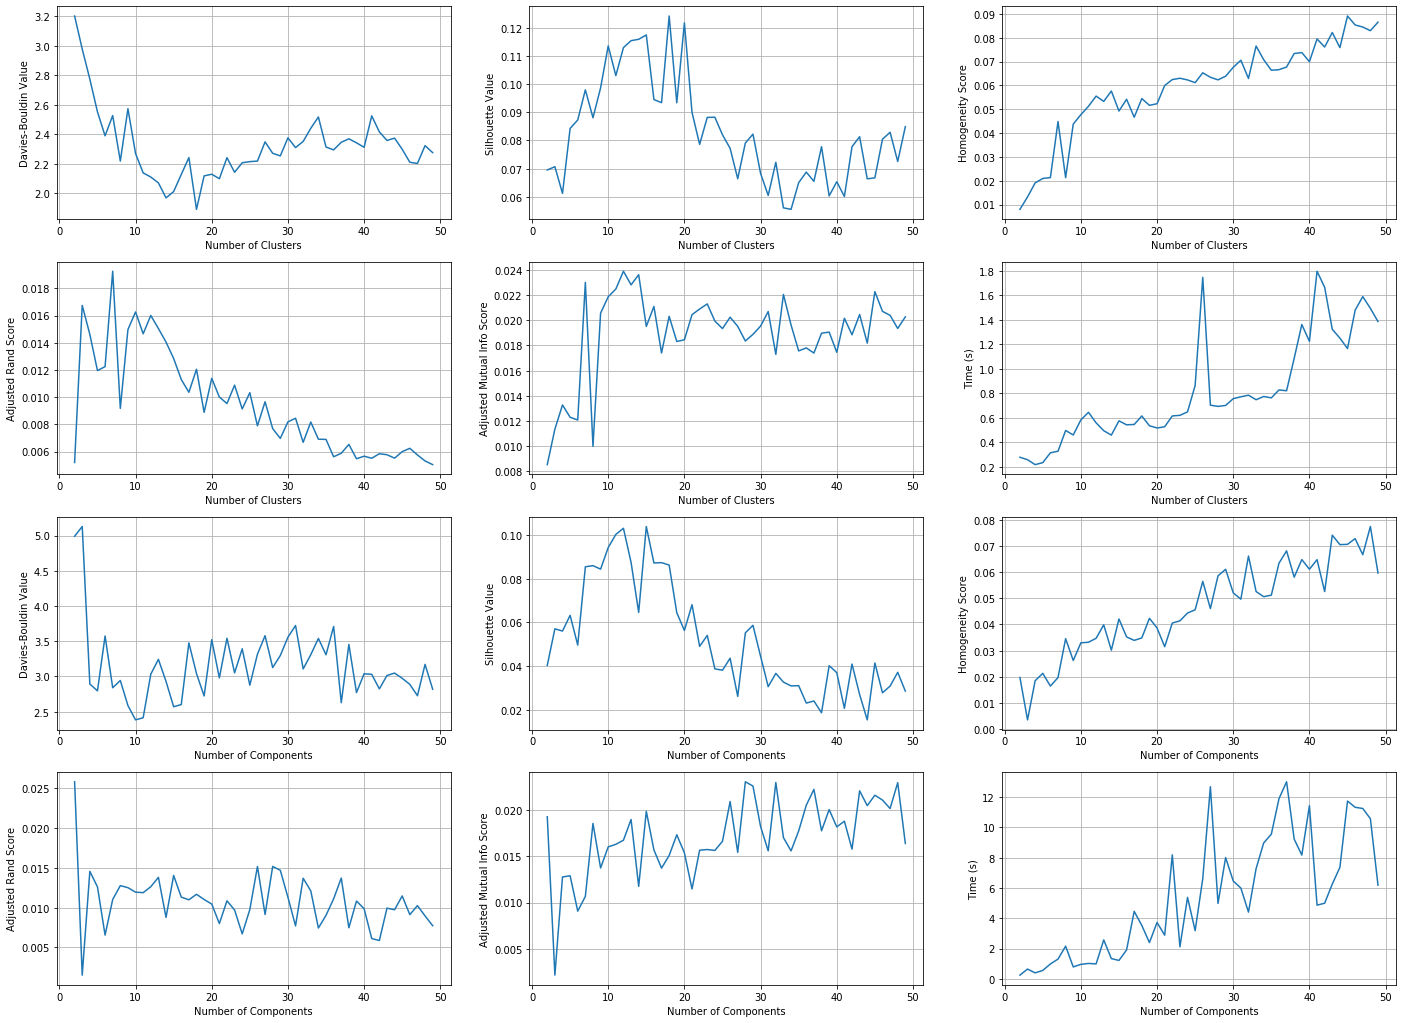

In [349]:
# Plot KM results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)

# Plot EM results
plt.subplot(4,3,7)
plt.plot(n_comps, davies_bouldin_em)
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,8)
plt.plot(n_comps, silhouette_em)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,9)
plt.plot(n_comps, homogeneity_em)
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,10)
plt.plot(n_comps, ARI_em)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,11)
plt.plot(n_comps, AMI_em)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,12)
plt.plot(n_comps, runtime_em)
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)

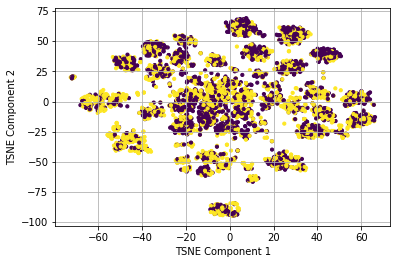

In [358]:
# Putting it all together
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# https://indico.io/blog/visualizing-with-t-sne/
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)

#kmeans = KMeans(n_clusters = 15, n_init=10)
#kmeans.fit(X)
#y_kmeans = kmeans.predict(X)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=10, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.grid(True)

In [327]:
# Compare k-means + NN

# Initialize data based on previous experiments
km = KMeans(n_clusters = 15, init='k-means++')
X_train_km = km.fit_transform(X_train, y_train)
X_test_km = km.fit_transform(X_test, y_test)
#X_train_km = KMeans.transform(X_train)
#X_test_km = KMeans.transform(X_test)

# Learning Curve using optimized hyperparameters
train_acc_km = []
test_acc_km = []
train_time_km = []
test_time_km = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train_km.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# Fit the model and test
n_epochs = range(1,7502,750)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train_km, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test_km, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc_km.append(train_avg)
    test_acc_km.append(test_avg)
    train_time_km.append(train_epoch)
    test_time_km.append(test_epoch)
    print("Completed %s iterations!"%str(n))
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Completed 1 iterations!
Completed 751 iterations!
Completed 1501 iterations!
Completed 2251 iterations!
Completed 3001 iterations!
Completed 3751 iterations!
Completed 4501 iterations!
Completed 5251 iterations!
Completed 6001 iterations!
Completed 6751 iterations!
Completed 7501 iterations!


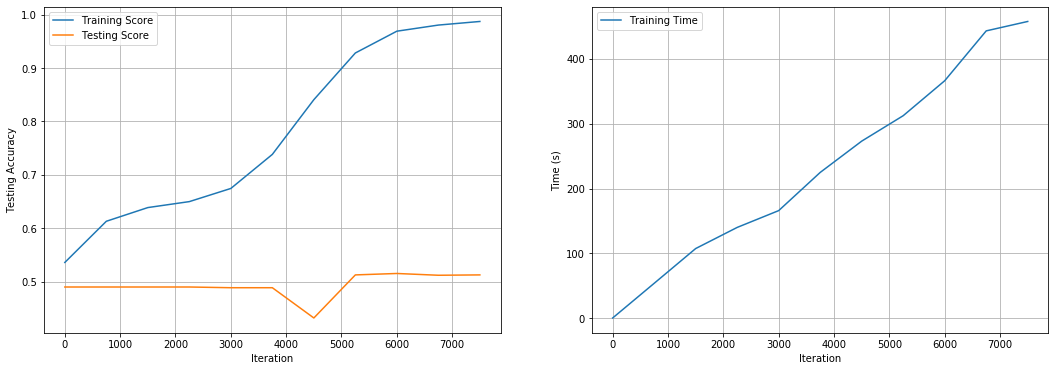

In [328]:
# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, train_acc_km, label = 'Training Score')
plt.plot(n_epochs, test_acc_km, label = 'Testing Score')
plt.ylabel('Testing Accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time_km, label = 'Training Time')
#plt.plot(n_epochs, test_time_km, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

In [331]:
# Compare EM + NN

# Initialize data based on previous experiments
em = GaussianMixture(n_components = 12)
em.fit(X_train)
X_train_em = em.predict(X_train)
X_test_em = em.predict(X_test)

X_train_em = np.array(X_train_em).reshape(-1,1)
X_test_em = np.array(X_test_em).reshape(-1,1)

#X_train_em = np.concatenate((X_train_em))
#X_test_em = KMeans.transform(X_test, y_test)

# Learning Curve using optimized hyperparameters
train_acc_em = []
test_acc_em = []
train_time_em = []
test_time_em = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train_em.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# Fit the model and test
n_epochs = range(1,7502,750)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train_em, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test_em, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc_em.append(train_avg)
    test_acc_em.append(test_avg)
    train_time_em.append(train_epoch)
    test_time_em.append(test_epoch)
    print("Completed %s iterations!"%str(n))
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Completed 1 iterations!
Completed 751 iterations!
Completed 1501 iterations!
Completed 2251 iterations!
Completed 3001 iterations!
Completed 3751 iterations!
Completed 4501 iterations!
Completed 5251 iterations!
Completed 6001 iterations!
Completed 6751 iterations!
Completed 7501 iterations!


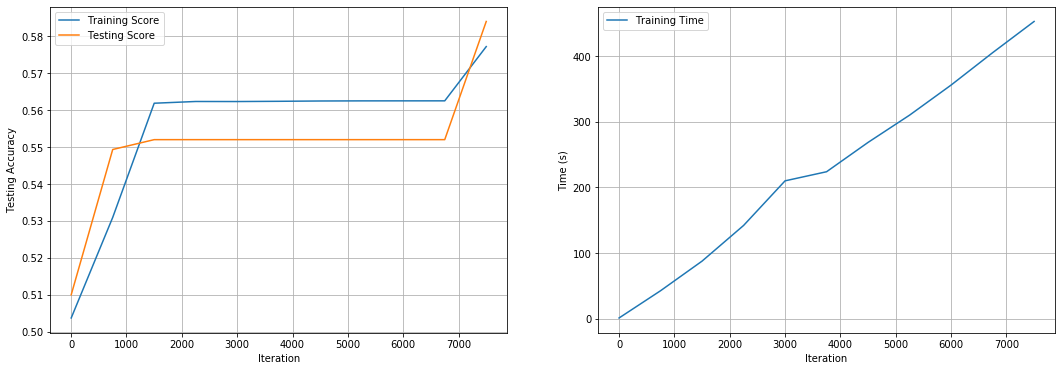

In [332]:
# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, train_acc_em, label = 'Training Score')
plt.plot(n_epochs, test_acc_em, label = 'Testing Score')
plt.ylabel('Testing Accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time_em, label = 'Training Time')
#plt.plot(n_epochs, test_time_em, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

Best parameter (CV score=0.569):
{'pca__n_components': 15}


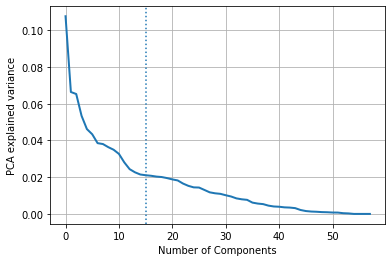

In [361]:
# Plotting source: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Docs https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

logistic = SGDClassifier(loss='log', early_stopping=True, max_iter=100)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

pca.fit(X_train)

n_comps = [3, 5, 8, 10, 15, 20, 25, 30, 35]

param_grid = {'pca__n_components': [3, 5, 8, 10, 15, 20, 25, 30, 35]}

search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig = plt.figure()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.xlabel('Number of Components')
plt.ylabel('PCA explained variance')
plt.grid(True)

Best parameter (CV score=0.575):
{'pca__n_components': 25}


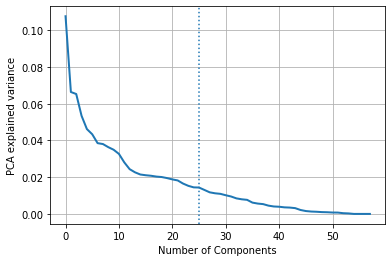

In [364]:
# Plotting source: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Docs https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

logistic = SGDClassifier(loss='log', early_stopping=True, max_iter=100)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

pca.fit(X_train)

n_comps = [3, 5, 8, 10, 15, 20, 25, 30, 35]

param_grid = {'pca__n_components': [3, 5, 8, 10, 15, 20, 25, 30, 35]}

search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig = plt.figure()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.xlabel('Number of Components')
plt.ylabel('PCA explained variance')
plt.grid(True)

In [362]:
# Use the optimal number of features for PCA
pca = PCA(n_components = 15)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Pass to clustering algorithms
davies_bouldin_km_pca = []
homogeneity_km_pca = []
silhouette_km_pca = []
ARI_km_pca = []
AMI_km_pca = []
runtime_km_pca = []

davies_bouldin_em_pca = []
homogeneity_em_pca = []
silhouette_em_pca = []
ARI_em_pca = []
AMI_em_pca = []
runtime_em_pca = []

# Number of target classes
#n = len(y.unique())

# K-Means
n_centers = range(2,50)

for n in n_centers:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = kmeans_cluster(X_train_pca, y_train, X_test_pca, y_test, n_iters = 100, n_clusters = n)
    davies_bouldin_km_pca.append(db)
    homogeneity_km_pca.append(homo)
    silhouette_km_pca.append(sil)
    ARI_km_pca.append(adjusted_rand_score)
    AMI_km_pca.append(adjusted_mutual_info_score)
    runtime_km_pca.append(end_time)
    
# EM
n_comps = range(2,50)

for n in n_comps:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = EM(X_train_pca, y_train, X_test_pca, y_test, n_iters = 100, n_components = n)
    davies_bouldin_em_pca.append(db)
    homogeneity_em_pca.append(homo)
    silhouette_em_pca.append(sil)
    ARI_em_pca.append(adjusted_rand_score)
    AMI_em_pca.append(adjusted_mutual_info_score)
    runtime_em_pca.append(end_time)
    

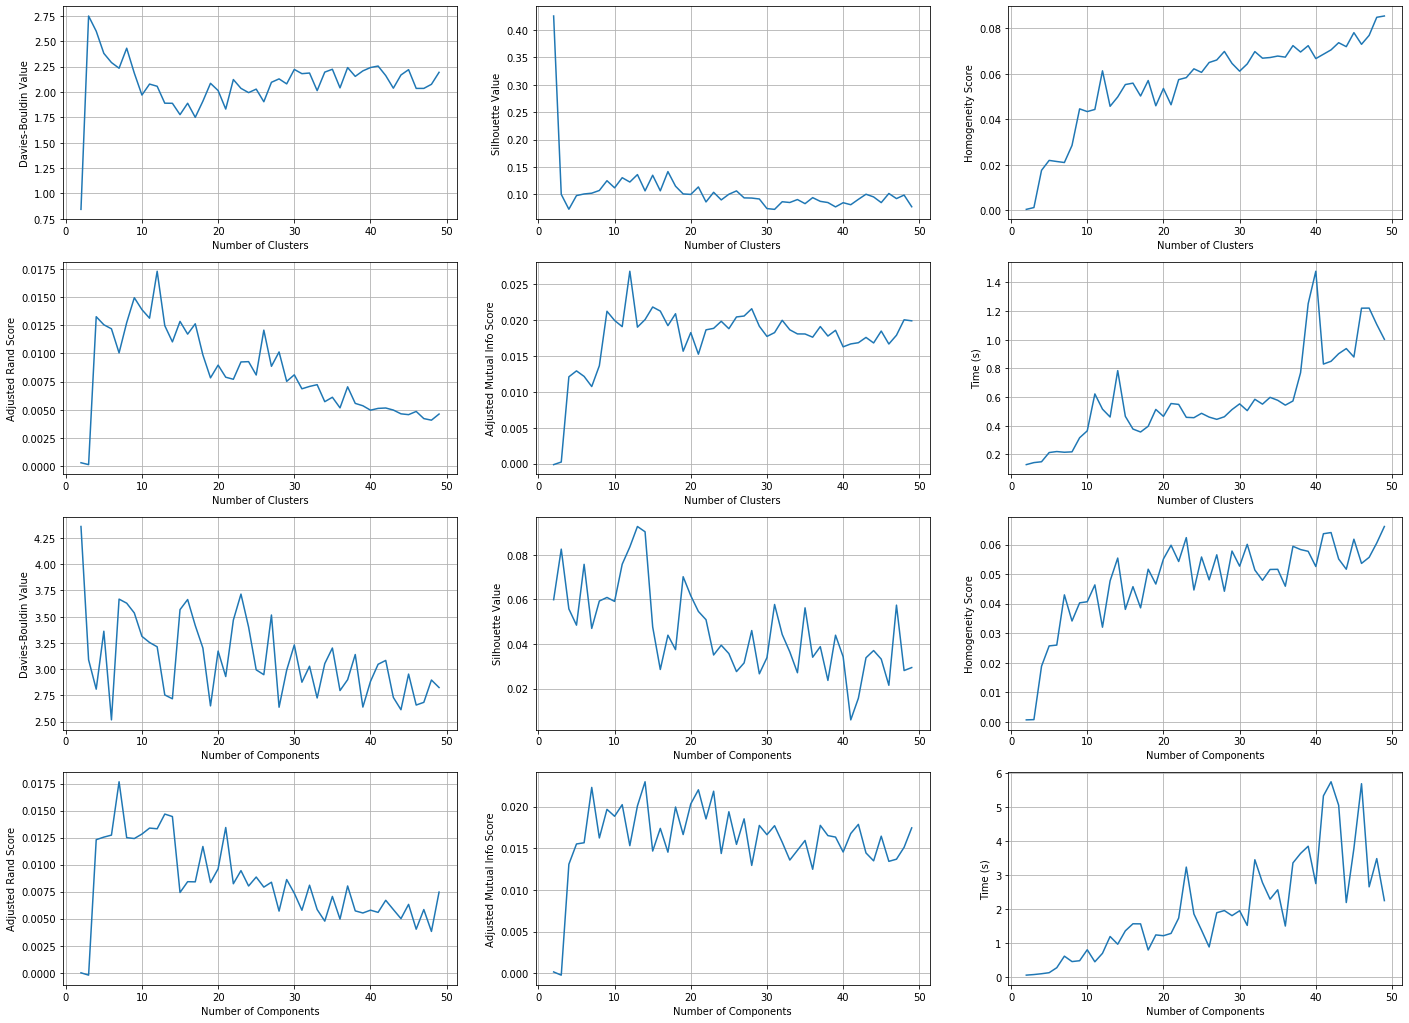

In [346]:
# Plot KM results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)

# Plot EM results
plt.subplot(4,3,7)
plt.plot(n_comps, davies_bouldin_em_pca)
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,8)
plt.plot(n_comps, silhouette_em_pca)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,9)
plt.plot(n_comps, homogeneity_em_pca)
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,10)
plt.plot(n_comps, ARI_em_pca)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,11)
plt.plot(n_comps, AMI_em_pca)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,12)
plt.plot(n_comps, runtime_em_pca)
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)

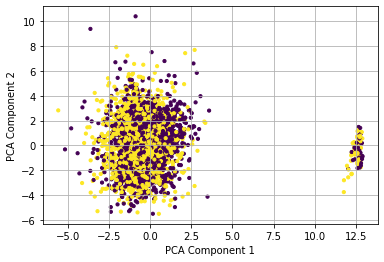

In [284]:
# Plotting source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
reduced_data = PCA(n_components = 20).fit_transform(X_train)
#kmeans = KMeans(n_clusters = 4, n_init=10)
#kmeans.fit(reduced_data)
#y_kmeans = kmeans.predict(reduced_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_train, s=10, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)

In [304]:
# Compare k-means + PCA with NN

# Initialize data based on previous experiments
pca = PCA(n_components = 20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Learning Curve using optimized hyperparameters
train_acc_pca = []
test_acc_pca = []
train_time_pca = []
test_time_pca = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train_pca.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# Fit the model and test
n_epochs = range(1,7502,750)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train_pca, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test_pca, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc_pca.append(train_avg)
    test_acc_pca.append(test_avg)
    train_time_pca.append(train_epoch)
    test_time_pca.append(test_epoch)
    print("Completed %s iterations!"%str(n))
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Completed 1 iterations!
Completed 751 iterations!
Completed 1501 iterations!
Completed 2251 iterations!
Completed 3001 iterations!
Completed 3751 iterations!
Completed 4501 iterations!
Completed 5251 iterations!
Completed 6001 iterations!
Completed 6751 iterations!
Completed 7501 iterations!


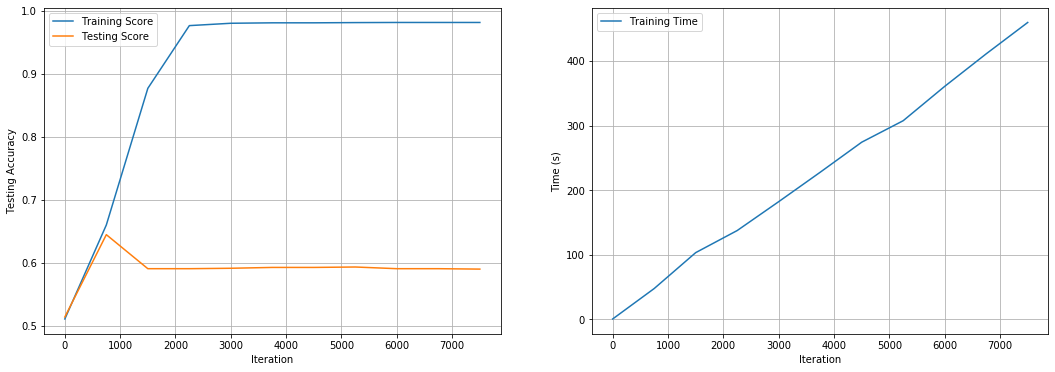

In [307]:
# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, train_acc_pca, label = 'Training Score')
plt.plot(n_epochs, test_acc_pca, label = 'Testing Score')
plt.ylabel('Testing Accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time_pca, label = 'Training Time')
#plt.plot(n_epochs, test_time_pca, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

Best parameter (CV score=0.587):
{'ica__n_components': 35}


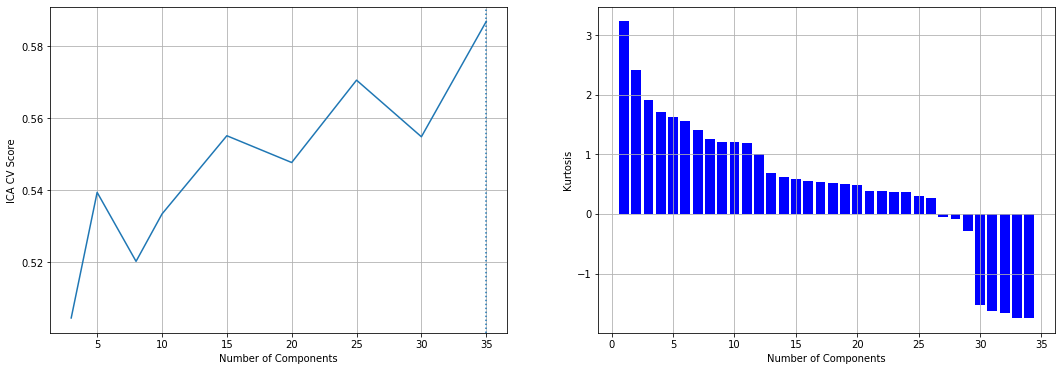

In [302]:
# ICA
# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

logistic = SGDClassifier(loss='log', early_stopping=True, max_iter=100)
ica = FastICA(max_iter = 1000)
pipe = Pipeline(steps=[('ica', ica), ('logistic', logistic)])

ica.fit(X_train)

n_comps = [3, 5, 8, 10, 15, 20, 25, 30, 35]

param_grid = {'ica__n_components': [3, 5, 8, 10, 15, 20, 25, 30, 35]}

search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

scores_array = search.cv_results_
scores = scores_array['mean_test_score']


kurtosis = []

# Calculate Kurtosis
# Source: https://github.com/siddharth691/Unsupervised-Learning/blob/master/dim_reduce_cluster_ica_sensor.py
def _calculate(X, ica_, n_components):
    
    components = ica_.components_
    ica_.components_ = components[:n_components]

    transformed = ica_.transform(X)
    ica_.components_ = components
 
    kurtosis = scipy.stats.kurtosis(transformed)

    return sorted(kurtosis, reverse = True)
  
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_comps, scores)
plt.axvline(search.best_estimator_.named_steps['ica'].n_components,
            linestyle=':', label='n_components chosen')
plt.xlabel('Number of Components')
plt.ylabel('ICA CV Score')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.bar(list(range(1,35)), _calculate(X,ica, 34) , linewidth=2, color = 'blue')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.grid(True)


In [249]:
# Use the optimal number of features for FastICA
ica = FastICA(n_components = 20, algorithm = 'parallel')
ica.fit(X_train)
X_train_ica = ica.transform(X_train)
X_test_ica = ica.transform(X_test)

# Pass to clustering algorithms
davies_bouldin_km_ica = []
homogeneity_km_ica = []
silhouette_km_ica = []
ARI_km_ica = []
AMI_km_ica = []
runtime_km_ica = []

davies_bouldin_em_ica = []
homogeneity_em_ica = []
silhouette_em_ica = []
ARI_em_ica = []
AMI_em_ica = []
runtime_em_ica = []

# K-Means
n_centers = range(2,50)

for n in n_centers:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = kmeans_cluster(X_train_ica, y_train, X_test_ica, y_test, n_iters = 100, n_clusters = n)
    davies_bouldin_km_ica.append(db)
    homogeneity_km_ica.append(homo)
    silhouette_km_ica.append(sil)
    ARI_km_ica.append(adjusted_rand_score)
    AMI_km_ica.append(adjusted_mutual_info_score)
    runtime_km_ica.append(end_time)

# EM
n_comps = range(2, 50)

for n in n_comps:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = EM(X_train_ica, y_train, X_test_ica, y_test, n_iters = 100, n_components = n)
    davies_bouldin_em_ica.append(db)
    homogeneity_em_ica.append(homo)
    silhouette_em_ica.append(sil)
    ARI_em_ica.append(adjusted_rand_score)
    AMI_em_ica.append(adjusted_mutual_info_score)
    runtime_em_ica.append(end_time)
        

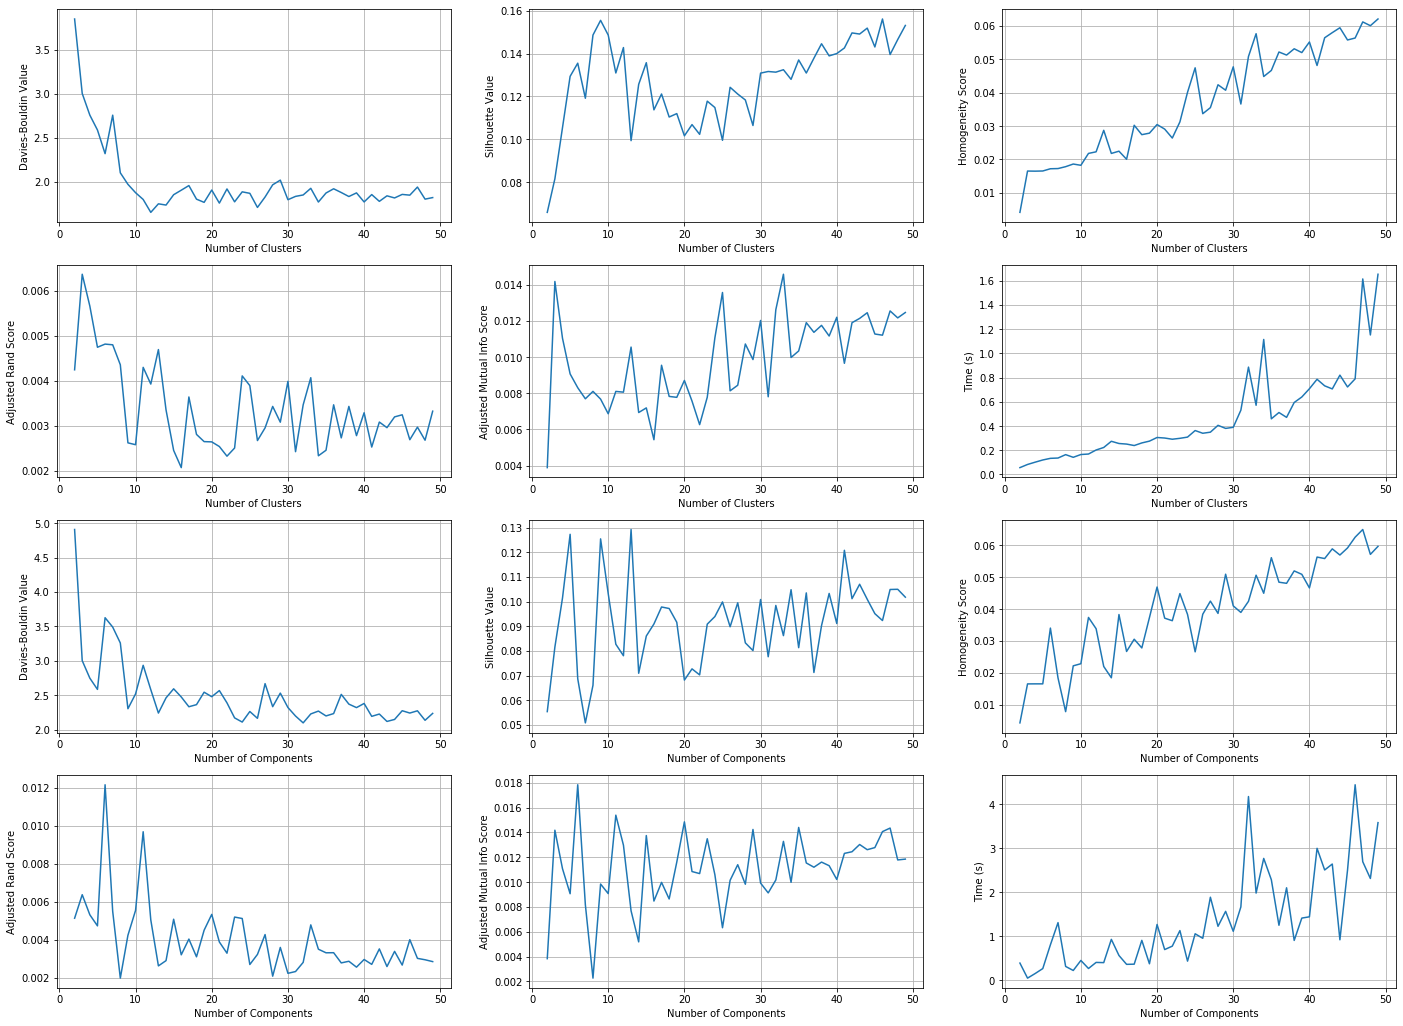

In [217]:
# Plot results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km_ica)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km_ica)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km_ica)
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km_ica)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km_ica)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km_ica)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)

# Plot results
plt.subplot(4,3,7)
plt.plot(n_comps, davies_bouldin_em_ica)
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,8)
plt.plot(n_comps, silhouette_em_ica)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,9)
plt.plot(n_comps, homogeneity_em_ica)
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,10)
plt.plot(n_comps, ARI_em_ica)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,11)
plt.plot(n_comps, AMI_em_ica)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,12)
plt.plot(n_comps, runtime_em_ica)
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)

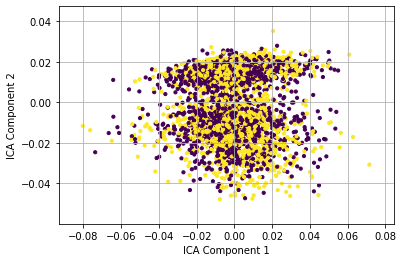

In [294]:
# Putting it all together
reduced_data = FastICA(n_components = 20).fit_transform(X_train)
#kmeans = KMeans(n_clusters = 4, n_init=10)
#kmeans.fit(reduced_data)
#y_kmeans = kmeans.predict(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_train, s=10, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.grid(True)

In [308]:
# Compare ICA + NN

# Initialize data based on previous experiments
ica = FastICA(n_components = 20)
ica.fit(X_train)
X_train_ica = ica.transform(X_train)
X_test_ica = ica.transform(X_test)

# Learning Curve using optimized hyperparameters
train_acc_ica = []
test_acc_ica = []
train_time_ica = []
test_time_ica = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train_ica.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# Fit the model and test
n_epochs = range(1,7502,750)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train_ica, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test_ica, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc_ica.append(train_avg)
    test_acc_ica.append(test_avg)
    train_time_ica.append(train_epoch)
    test_time_ica.append(test_epoch)
    print("Completed %s iterations!"%str(n))
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Completed 1 iterations!
Completed 751 iterations!
Completed 1501 iterations!
Completed 2251 iterations!
Completed 3001 iterations!
Completed 3751 iterations!
Completed 4501 iterations!
Completed 5251 iterations!
Completed 6001 iterations!
Completed 6751 iterations!
Completed 7501 iterations!


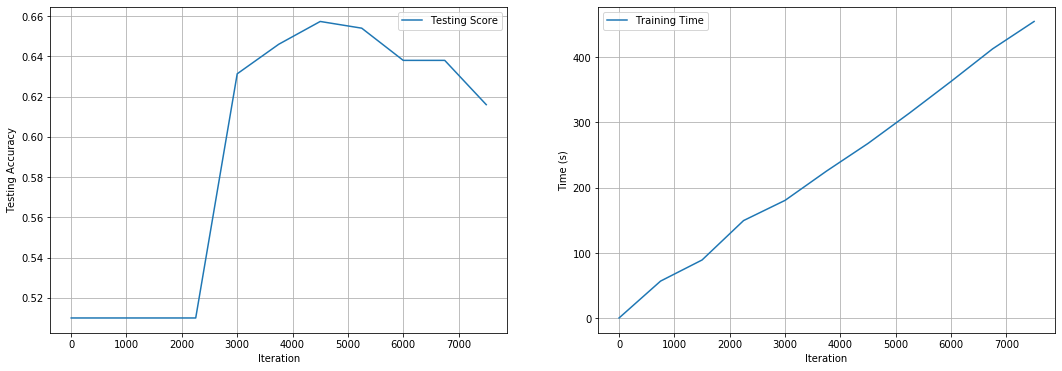

In [350]:
# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
#plt.plot(n_epochs, train_acc_ica, label = 'Training Score')
plt.plot(n_epochs, test_acc_ica, label = 'Testing Score')
plt.ylabel('Testing Accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time_ica, label = 'Training Time')
#plt.plot(n_epochs, test_time_ica, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

Best parameter (CV score=0.557):
{'rp__n_components': 35}


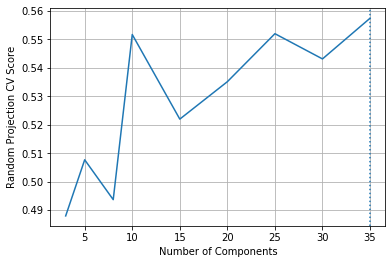

In [242]:
# Randomized Projection
# Documentation: https://scikit-learn.org/stable/modules/random_projection.html
logistic = SGDClassifier(loss='log', early_stopping=True, max_iter=100)
rp = random_projection.GaussianRandomProjection(n_components=12)
pipe = Pipeline(steps=[('rp', rp), ('logistic', logistic)])

rp.fit(X_train)

n_comps = [3, 5, 8, 10, 15, 20, 25, 30, 35]

param_grid = {'rp__n_components': [3, 5, 8, 10, 15, 20, 25, 30, 35]}

search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the Random Projection spectrum
rp.fit(X_train)

scores_array = search.cv_results_
scores = scores_array['mean_test_score']

fig = plt.figure()
plt.plot(n_comps, scores)
plt.axvline(search.best_estimator_.named_steps['rp'].n_components,
            linestyle=':', label='n_components chosen')
plt.xlabel('Number of Components')
plt.ylabel('Random Projection CV Score')
plt.grid(True)

In [218]:
# Use the optimal number of features for Random Projection
rp = random_projection.GaussianRandomProjection(n_components=35)
rp.fit(X_train)
X_train_rp = rp.transform(X_train)
X_test_rp = rp.transform(X_test)

# Pass to clustering algorithms
davies_bouldin_km_rp = []
homogeneity_km_rp = []
silhouette_km_rp = []
ARI_km_rp = []
AMI_km_rp = []
runtime_km_rp = []

davies_bouldin_em_rp = []
homogeneity_em_rp = []
silhouette_em_rp = []
ARI_em_rp = []
AMI_em_rp = []
runtime_em_rp = []

# K-Means
n_centers = range(2,50)

for n in n_centers:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = kmeans_cluster(X_train_ica, y_train, X_test_ica, y_test, n_iters = 100, n_clusters = n)
    davies_bouldin_km_rp.append(db)
    homogeneity_km_rp.append(homo)
    silhouette_km_rp.append(sil)
    ARI_km_rp.append(adjusted_rand_score)
    AMI_km_rp.append(adjusted_mutual_info_score)
    runtime_km_rp.append(end_time)

# EM
n_comps = range(2, 50)

for n in n_comps:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = EM(X_train_ica, y_train, X_test_ica, y_test, n_iters = 100, n_components = n)
    davies_bouldin_em_rp.append(db)
    homogeneity_em_rp.append(homo)
    silhouette_em_rp.append(sil)
    ARI_em_rp.append(adjusted_rand_score)
    AMI_em_rp.append(adjusted_mutual_info_score)
    runtime_em_rp.append(end_time)
        

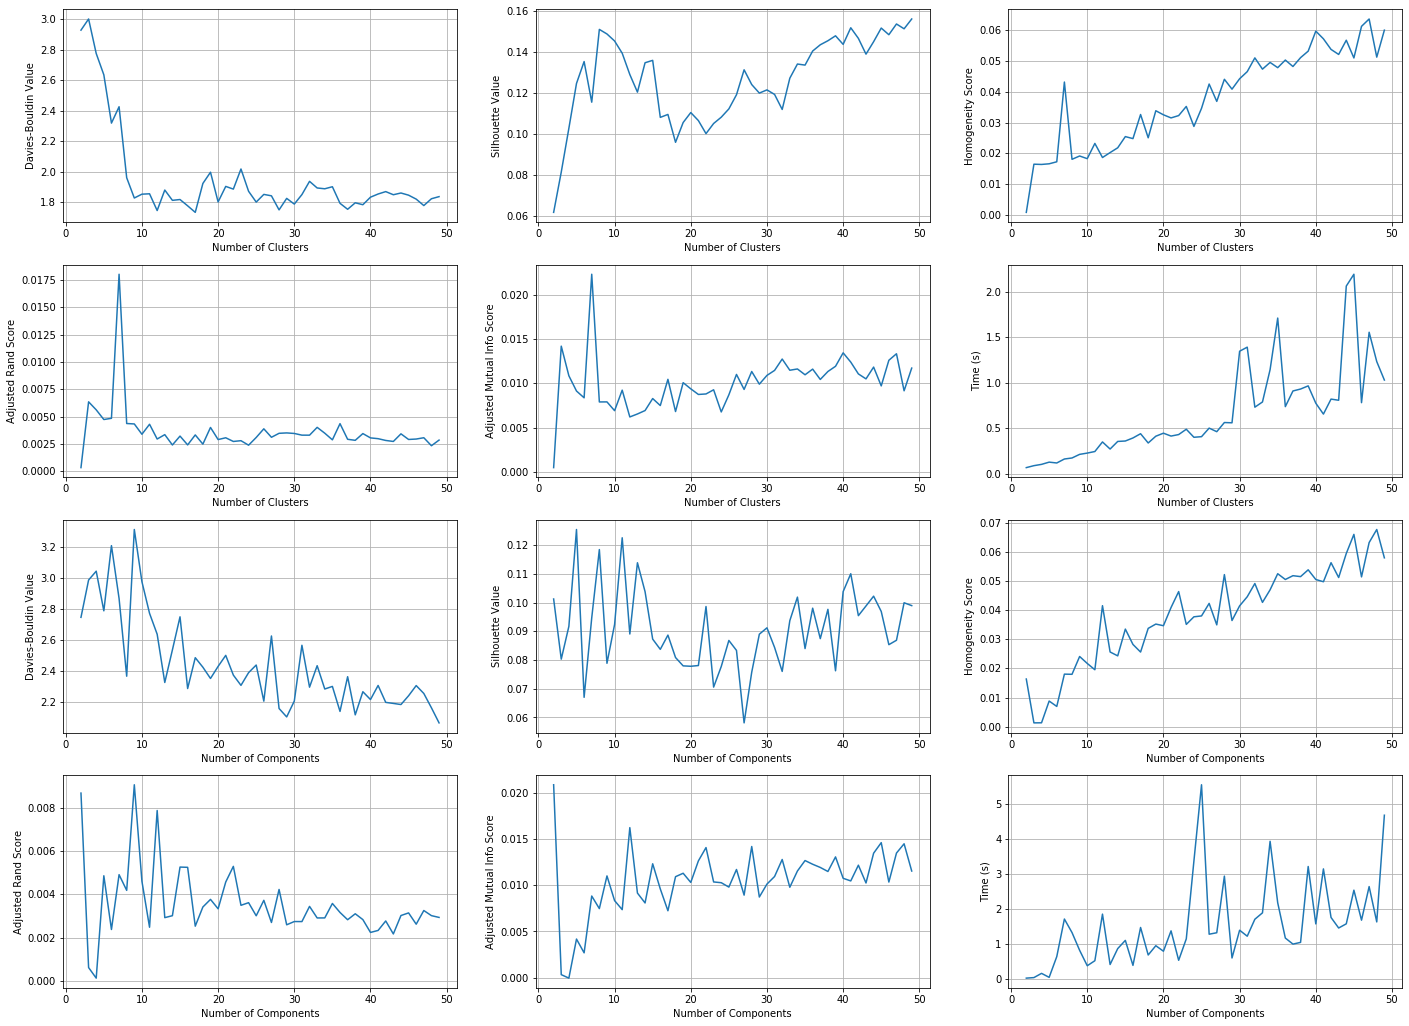

In [219]:
# Plot results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km_rp)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km_rp)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km_rp)
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km_rp)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km_rp)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km_rp)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)

# Plot results
plt.subplot(4,3,7)
plt.plot(n_comps, davies_bouldin_em_rp)
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,8)
plt.plot(n_comps, silhouette_em_rp)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,9)
plt.plot(n_comps, homogeneity_em_rp)
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,10)
plt.plot(n_comps, ARI_em_rp)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,11)
plt.plot(n_comps, AMI_em_rp)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,12)
plt.plot(n_comps, runtime_em_rp)
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)

In [312]:
# Compare random projection + NN
# Initialize data based on previous experiments
rp = random_projection.GaussianRandomProjection(n_components=35)
rp.fit(X_train)
X_train_rp = rp.transform(X_train)
X_test_rp = rp.transform(X_test)
# Learning Curve using optimized hyperparameters
train_acc_rp = []
test_acc_rp = []
train_time_rp = []
test_time_rp = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train_rp.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# Fit the model and test
n_epochs = range(1,7502,750)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train_rp, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test_rp, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc_rp.append(train_avg)
    test_acc_rp.append(test_avg)
    train_time_rp.append(train_epoch)
    test_time_rp.append(test_epoch)
    print("Completed %s iterations!"%str(n))
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Completed 1 iterations!
Completed 751 iterations!
Completed 1501 iterations!
Completed 2251 iterations!
Completed 3001 iterations!
Completed 3751 iterations!
Completed 4501 iterations!
Completed 5251 iterations!
Completed 6001 iterations!
Completed 6751 iterations!
Completed 7501 iterations!


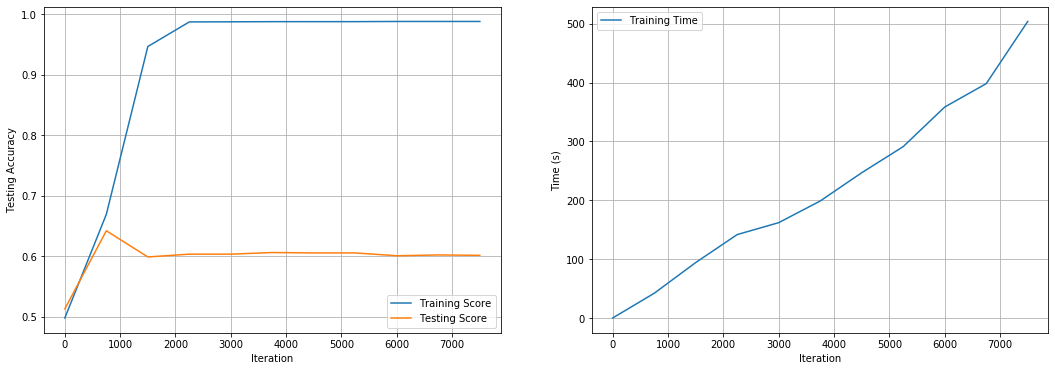

In [313]:
# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, train_acc_rp, label = 'Training Score')
plt.plot(n_epochs, test_acc_rp, label = 'Testing Score')
plt.ylabel('Testing Accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time_rp, label = 'Training Time')
#plt.plot(n_epochs, test_time_rp, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

Best parameter (CV score=0.565):
{'fa__n_clusters': 20}


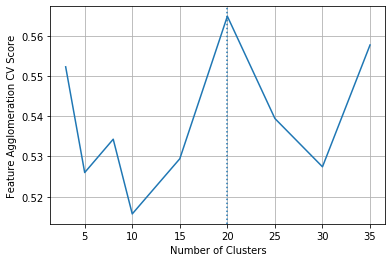

In [243]:
# FeatureAgglomeration
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration
logistic = SGDClassifier(loss='log', early_stopping=True, max_iter=100)
fa = FeatureAgglomeration()
pipe = Pipeline(steps=[('fa', fa), ('logistic', logistic)])

fa.fit(X_train)

n_clusters = [3, 5, 8, 10, 15, 20, 25, 30, 35]

param_grid = {'fa__n_clusters': [3, 5, 8, 10, 15, 20, 25, 30, 35]}

search = GridSearchCV(pipe, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

scores_array = search.cv_results_
scores = scores_array['mean_test_score']

fig = plt.figure()
plt.plot(n_clusters, scores)
plt.axvline(search.best_estimator_.named_steps['fa'].n_clusters,
            linestyle=':', label='n_clusters chosen')
plt.xlabel('Number of Clusters')
plt.ylabel('Feature Agglomeration CV Score')
plt.grid(True)

In [318]:
# Use the optimal number of features for Random Projection
fa = FeatureAgglomeration(n_clusters = 15)
fa.fit(X_train)
X_train_fa = fa.transform(X_train)
X_test_fa = fa.transform(X_test)

# Pass to clustering algorithms
davies_bouldin_km_fa = []
homogeneity_km_fa = []
silhouette_km_fa = []
ARI_km_fa = []
AMI_km_fa = []
runtime_km_fa = []

davies_bouldin_em_fa = []
homogeneity_em_fa = []
silhouette_em_fa = []
ARI_em_fa = []
AMI_em_fa = []
runtime_em_fa = []

# K-Means
n_centers = range(2,50)

for n in n_centers:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = kmeans_cluster(X_train_ica, y_train, X_test_ica, y_test, n_iters = 100, n_clusters = n)
    davies_bouldin_km_fa.append(db)
    homogeneity_km_fa.append(homo)
    silhouette_km_fa.append(sil)
    ARI_km_fa.append(adjusted_rand_score)
    AMI_km_fa.append(adjusted_mutual_info_score)
    runtime_km_fa.append(end_time)

# EM
n_comps = range(2, 50)

for n in n_comps:
    db, homo, sil, adjusted_rand_score, adjusted_mutual_info_score, end_time = EM(X_train_ica, y_train, X_test_ica, y_test, n_iters = 100, n_components = n)
    davies_bouldin_em_fa.append(db)
    homogeneity_em_fa.append(homo)
    silhouette_em_fa.append(sil)
    ARI_em_fa.append(adjusted_rand_score)
    AMI_em_fa.append(adjusted_mutual_info_score)
    runtime_em_fa.append(end_time)
        

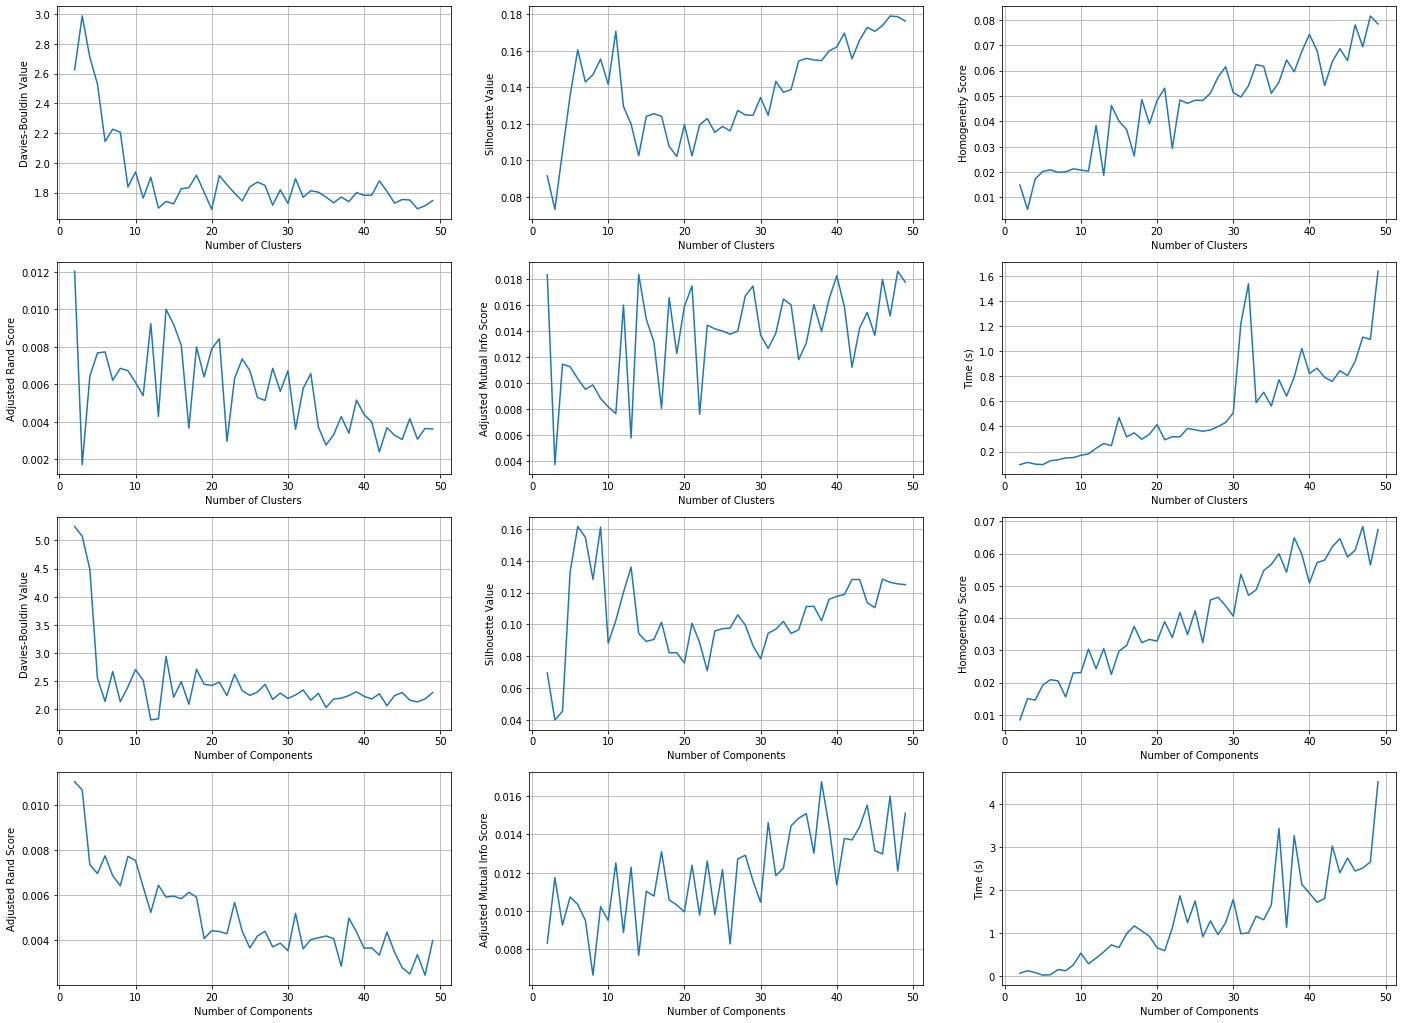

In [319]:
# Plot results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)

# Plot results
plt.subplot(4,3,7)
plt.plot(n_comps, davies_bouldin_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,8)
plt.plot(n_comps, silhouette_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,9)
plt.plot(n_comps, homogeneity_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,10)
plt.plot(n_comps, ARI_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,11)
plt.plot(n_comps, AMI_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,12)
plt.plot(n_comps, runtime_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)

In [314]:
# Compare random projection + NN
# Initialize data based on previous experiments
fa = FeatureAgglomeration(n_clusters = 15)
fa.fit(X_train)
X_train_fa = fa.transform(X_train)
X_test_fa = fa.transform(X_test)
# Learning Curve using optimized hypefaarameters
train_acc_fa = []
test_acc_fa = []
train_time_fa = []
test_time_fa = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train_fa.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# Fit the model and test
n_epochs = range(1,7502,750)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train_fa, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test_fa, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc_fa.append(train_avg)
    test_acc_fa.append(test_avg)
    train_time_fa.append(train_epoch)
    test_time_fa.append(test_epoch)
    print("Completed %s iterations!"%str(n))
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Completed 1 iterations!
Completed 751 iterations!
Completed 1501 iterations!
Completed 2251 iterations!
Completed 3001 iterations!
Completed 3751 iterations!
Completed 4501 iterations!
Completed 5251 iterations!
Completed 6001 iterations!
Completed 6751 iterations!
Completed 7501 iterations!


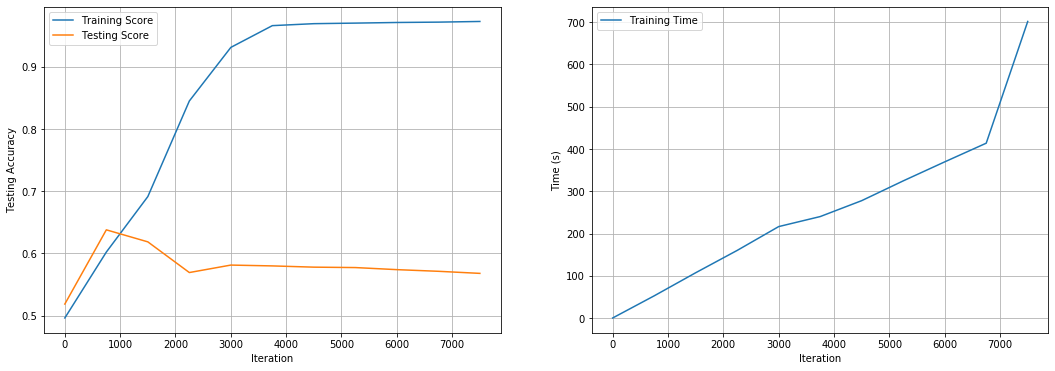

In [315]:
# summarize history for accuracy
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, train_acc_fa, label = 'Training Score')
plt.plot(n_epochs, test_acc_fa, label = 'Testing Score')
plt.ylabel('Testing Accuracy')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time_fa, label = 'Training Time')
#plt.plot(n_epochs, test_time_fa, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend()

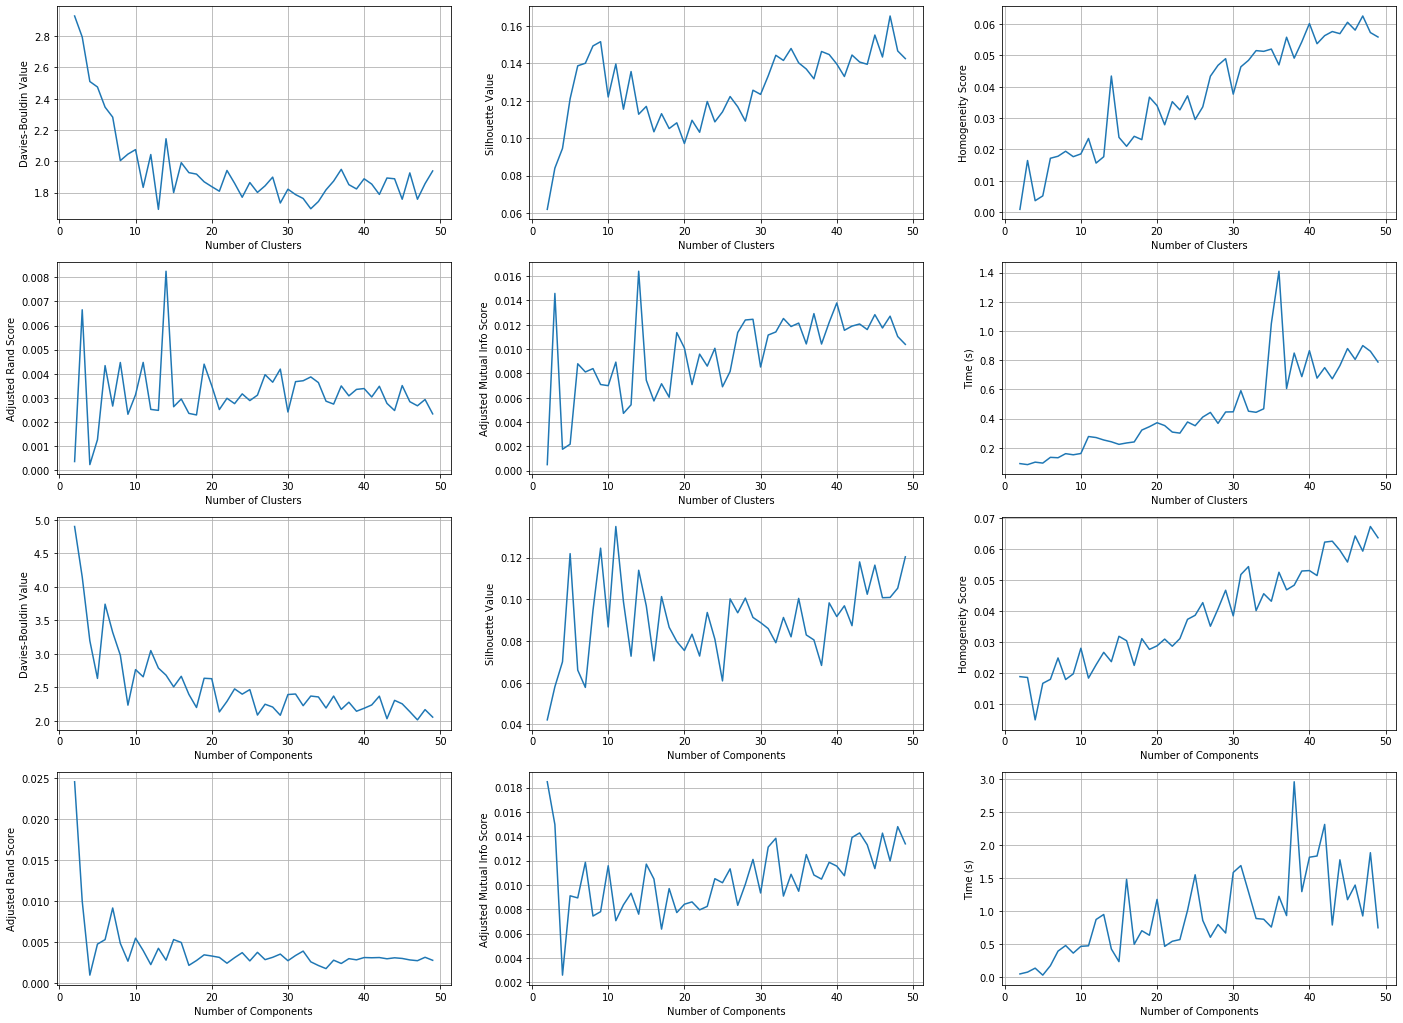

In [227]:
# Plot results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km_fa)
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)

# Plot results
plt.subplot(4,3,7)
plt.plot(n_comps, davies_bouldin_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.subplot(4,3,8)
plt.plot(n_comps, silhouette_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.subplot(4,3,9)
plt.plot(n_comps, homogeneity_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.subplot(4,3,10)
plt.plot(n_comps, ARI_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.subplot(4,3,11)
plt.plot(n_comps, AMI_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.subplot(4,3,12)
plt.plot(n_comps, runtime_em_fa)
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)

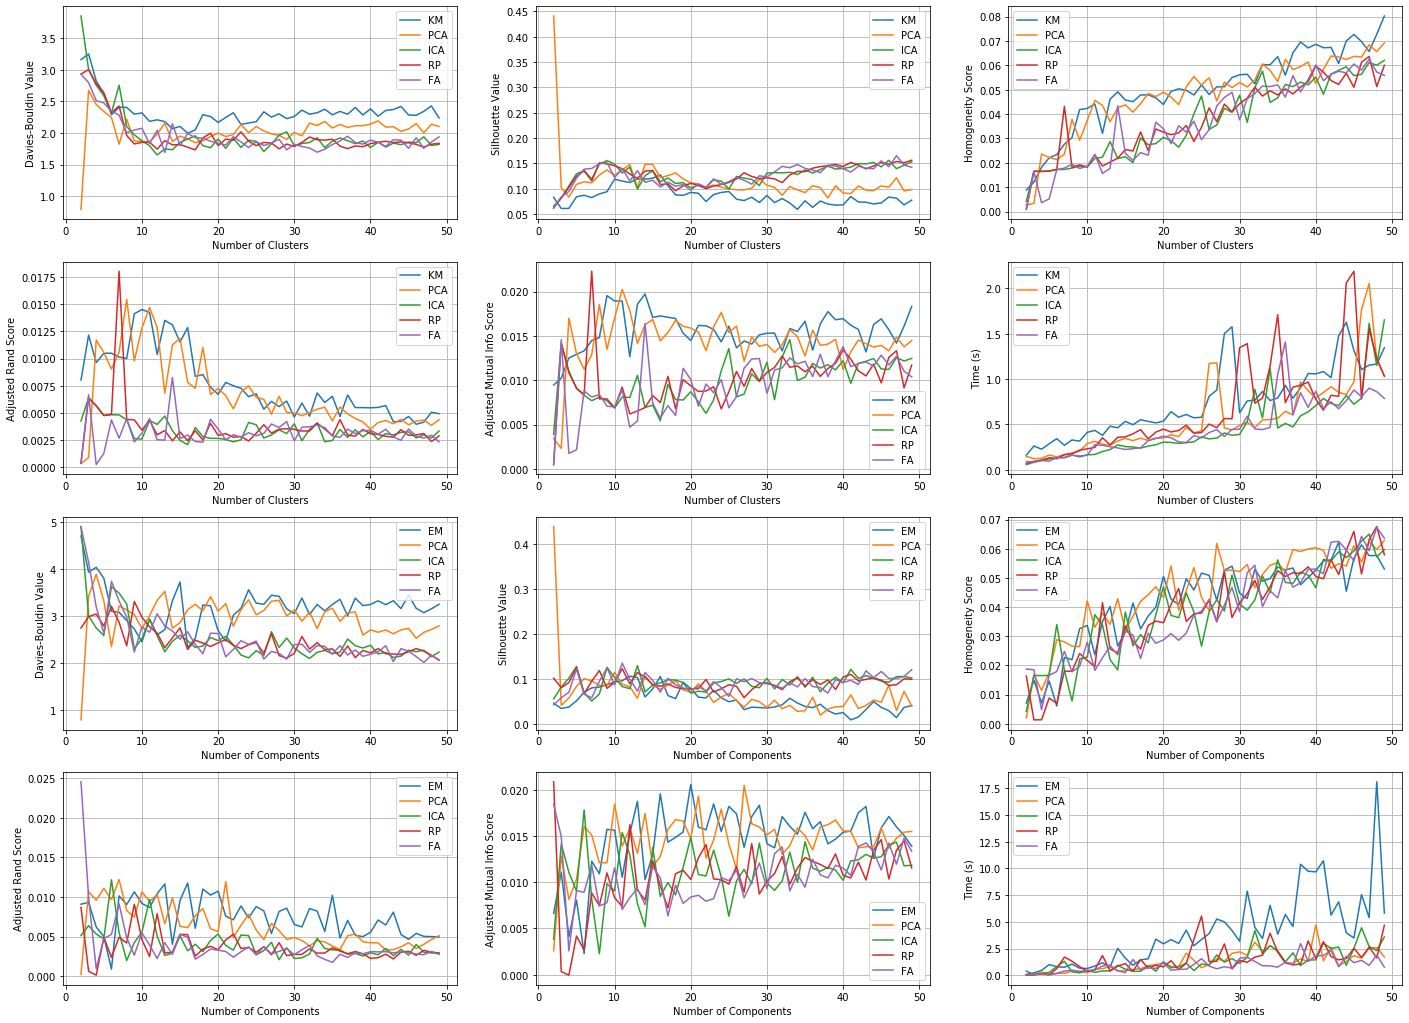

In [232]:
# Summary Graphs

# Plot KM results
fig = plt.figure(figsize=(24,18))
plt.subplot(4,3,1)
plt.plot(n_centers, davies_bouldin_km, label = 'KM')
plt.plot(n_centers, davies_bouldin_km_pca, label = 'PCA')
plt.plot(n_centers, davies_bouldin_km_ica, label = 'ICA')
plt.plot(n_centers, davies_bouldin_km_rp, label = 'RP')
plt.plot(n_centers, davies_bouldin_km_fa, label = 'FA')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.legend()

plt.subplot(4,3,2)
plt.plot(n_centers, silhouette_km, label = 'KM')
plt.plot(n_centers, silhouette_km_pca, label = 'PCA')
plt.plot(n_centers, silhouette_km_ica, label = 'ICA')
plt.plot(n_centers, silhouette_km_rp, label = 'RP')
plt.plot(n_centers, silhouette_km_fa, label = 'FA')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.legend()

plt.subplot(4,3,3)
plt.plot(n_centers, homogeneity_km, label = 'KM')
plt.plot(n_centers, homogeneity_km_pca, label = 'PCA')
plt.plot(n_centers, homogeneity_km_ica, label = 'ICA')
plt.plot(n_centers, homogeneity_km_rp, label = 'RP')
plt.plot(n_centers, homogeneity_km_fa, label = 'FA')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.legend()

plt.subplot(4,3,4)
plt.plot(n_centers, ARI_km, label = 'KM')
plt.plot(n_centers, ARI_km_pca, label = 'PCA')
plt.plot(n_centers, ARI_km_ica, label = 'ICA')
plt.plot(n_centers, ARI_km_rp, label = 'RP')
plt.plot(n_centers, ARI_km_fa, label = 'FA')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.legend()

plt.subplot(4,3,5)
plt.plot(n_centers, AMI_km, label = 'KM')
plt.plot(n_centers, AMI_km_pca, label = 'PCA')
plt.plot(n_centers, AMI_km_ica, label = 'ICA')
plt.plot(n_centers, AMI_km_rp, label = 'RP')
plt.plot(n_centers, AMI_km_fa, label = 'FA')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.legend()

plt.subplot(4,3,6)
plt.plot(n_centers, runtime_km, label = 'KM')
plt.plot(n_centers, runtime_km_pca, label = 'PCA')
plt.plot(n_centers, runtime_km_ica, label = 'ICA')
plt.plot(n_centers, runtime_km_rp, label = 'RP')
plt.plot(n_centers, runtime_km_fa, label = 'FA')
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.grid(True)
plt.legend()

# Plot EM results
plt.subplot(4,3,7)
plt.plot(n_centers, davies_bouldin_em, label = 'EM')
plt.plot(n_centers, davies_bouldin_em_pca, label = 'PCA')
plt.plot(n_centers, davies_bouldin_em_ica, label = 'ICA')
plt.plot(n_centers, davies_bouldin_em_rp, label = 'RP')
plt.plot(n_centers, davies_bouldin_em_fa, label = 'FA')
plt.xlabel('Number of Components')
plt.ylabel('Davies-Bouldin Value')
plt.grid(True)
plt.legend()

plt.subplot(4,3,8)
plt.plot(n_centers, silhouette_em, label = 'EM')
plt.plot(n_centers, silhouette_em_pca, label = 'PCA')
plt.plot(n_centers, silhouette_em_ica, label = 'ICA')
plt.plot(n_centers, silhouette_em_rp, label = 'RP')
plt.plot(n_centers, silhouette_em_fa, label = 'FA')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Value')
plt.grid(True)
plt.legend()

plt.subplot(4,3,9)
plt.plot(n_centers, homogeneity_em, label = 'EM')
plt.plot(n_centers, homogeneity_em_pca, label = 'PCA')
plt.plot(n_centers, homogeneity_em_ica, label = 'ICA')
plt.plot(n_centers, homogeneity_em_rp, label = 'RP')
plt.plot(n_centers, homogeneity_em_fa, label = 'FA')
plt.xlabel('Number of Components')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.legend()

plt.subplot(4,3,10)
plt.plot(n_centers, ARI_em, label = 'EM')
plt.plot(n_centers, ARI_em_pca, label = 'PCA')
plt.plot(n_centers, ARI_em_ica, label = 'ICA')
plt.plot(n_centers, ARI_em_rp, label = 'RP')
plt.plot(n_centers, ARI_em_fa, label = 'FA')
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)
plt.legend()

plt.subplot(4,3,11)
plt.plot(n_centers, AMI_em, label = 'EM')
plt.plot(n_centers, AMI_em_pca, label = 'PCA')
plt.plot(n_centers, AMI_em_ica, label = 'ICA')
plt.plot(n_centers, AMI_em_rp, label = 'RP')
plt.plot(n_centers, AMI_em_fa, label = 'FA')
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Mutual Info Score')
plt.grid(True)
plt.legend()

plt.subplot(4,3,12)
plt.plot(n_centers, runtime_em, label = 'EM')
plt.plot(n_centers, runtime_em_pca, label = 'PCA')
plt.plot(n_centers, runtime_em_ica, label = 'ICA')
plt.plot(n_centers, runtime_em_rp, label = 'RP')
plt.plot(n_centers, runtime_em_fa, label = 'FA')
plt.xlabel('Number of Components')
plt.ylabel('Time (s)')
plt.grid(True)
plt.legend()


Text(0, 0.5, 'Training Time (s)')

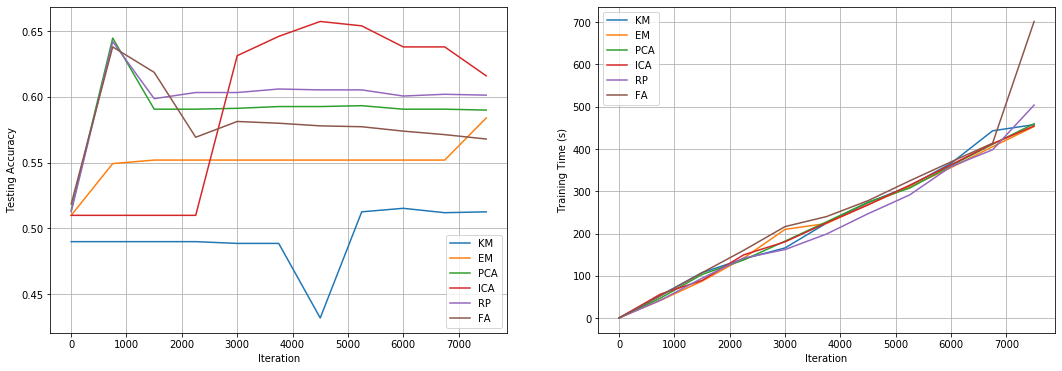

In [359]:
# Compare NN Runs
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, test_acc_km, label = 'KM')
plt.plot(n_epochs, test_acc_em, label = 'EM')
plt.plot(n_epochs, test_acc_pca, label = 'PCA')
plt.plot(n_epochs, test_acc_ica, label = 'ICA')
plt.plot(n_epochs, test_acc_rp, label = 'RP')
plt.plot(n_epochs, test_acc_fa, label = 'FA')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(n_epochs, train_time_km, label = 'KM')
plt.plot(n_epochs, train_time_em, label = 'EM')
plt.plot(n_epochs, train_time_pca, label = 'PCA')
plt.plot(n_epochs, train_time_ica, label = 'ICA')
plt.plot(n_epochs, train_time_rp, label = 'RP')
plt.plot(n_epochs, train_time_fa, label = 'FA')
plt.grid(True)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Training Time (s)')
